## Medicine Usage and Side Effects and Subtities

#### Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

In [38]:
## 1) Problem Statements
'''
About Dataset
 This dataset contains comprehensive information on over 248,000 medical drugs from all manufacturers available
 worldwide. The data includes details such as drug names, active ingredients, therapeutic uses, dosage, side effects,
 and substitutes. The dataset aims to provide a useful resource for medical researchers, healthcare professionals,
 and drug manufacturers.
 The dataset contains the following information for each drug:
 1. Drug name
 2. Adverse reactions and side effects
 3. Drug interactions
 4. Drug class
 5. Substitute drugs
 6. Active ingredients [Available in previous dataset published by us. Link added Below]
 
 '''


'\nAbout Dataset\n This dataset contains comprehensive information on over 248,000 medical drugs from all manufacturers available\n worldwide. The data includes details such as drug names, active ingredients, therapeutic uses, dosage, side effects,\n and substitutes. The dataset aims to provide a useful resource for medical researchers, healthcare professionals,\n and drug manufacturers.\n The dataset contains the following information for each drug:\n 1. Drug name\n 2. Adverse reactions and side effects\n 3. Drug interactions\n 4. Drug class\n 5. Substitute drugs\n 6. Active ingredients [Available in previous dataset published by us. Link added Below]\n \n '

## Importing Packages

In [41]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Import CSV data as a Pandas dataframe

In [43]:
data= pd.read_csv('E:/Medicines Usage/notebook/250k Medicines Usage, Side Effects and Substitutes.csv')

In [40]:
!pip install scikit-learn

  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   --------- ------------------------------ 2.6/11.0 MB 12.5 MB/s eta 0:00:01
   ------------------ --------------------- 5.0/11.0 MB 11.6 MB/s eta 0:00:01
   --------------------------- ------------ 7.6/11.0 MB 12.0 MB/s eta 0:00:01
   -------------------------------------- - 10.5/11.0 MB 12.6 MB/s eta 0:00:01
   ---------------------------------------- 11.0/11.0 MB 12.3 MB/s eta 0:00:00
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
   ---------------------------------------- 0.0/44.5 MB ? eta -:--:--
   -- ------------------------------------- 3.1/44.5 MB 16.8 MB/s eta 0:00:03
   ----- ---------------------------------- 6.3/44.5 MB 15.4 MB/s eta 0:00:03
   -------- ------------------------------- 9.4/44.5 MB 15.0 MB/s eta 0:00:03
   ----------- ---------------------------- 12.6/4

In [44]:
## Step 3: Inital Data Overview

print(data.info())

print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248218 entries, 0 to 248217
Data columns (total 58 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   id                 248218 non-null  int64 
 1   name               248218 non-null  object
 2   substitute0        238621 non-null  object
 3   substitute1        233867 non-null  object
 4   substitute2        230233 non-null  object
 5   substitute3        226856 non-null  object
 6   substitute4        223962 non-null  object
 7   sideEffect0        248218 non-null  object
 8   sideEffect1        238416 non-null  object
 9   sideEffect2        229500 non-null  object
 10  sideEffect3        207638 non-null  object
 11  sideEffect4        163560 non-null  object
 12  sideEffect5        131258 non-null  object
 13  sideEffect6        91857 non-null   object
 14  sideEffect7        67750 non-null   object
 15  sideEffect8        48506 non-null   object
 16  sideEffect9        3

In [45]:
## Step4: Initialization Data Cleaning
## Handling Missing Values
# fill substitutes with No Substitutes

for i in range(5):
     data[f'sideEffect{i}'].fillna('No Side Effect', inplace=True)


In [46]:
# Optionally, drop rows where key features are missing (if necessary)
data.dropna(subset=['Chemical Class'], inplace=True)

In [47]:
## 4.2 Drop Irrelevant Columns
data.drop(['id', 'name'], axis=1, inplace=True)

In [48]:
data.head()

,substitute0,substitute1,substitute2,substitute3,substitute4,sideEffect0,sideEffect1,sideEffect2,sideEffect3,sideEffect4,...,sideEffect41,use0,use1,use2,use3,use4,Chemical Class,Habit Forming,Therapeutic Class,Action Class
1,Zithrocare 500mg Tablet,Azax 500 Tablet,Zady 500 Tablet,Cazithro 500mg Tablet,Trulimax 500mg Tablet,Vomiting,Nausea,Abdominal pain,Diarrhea,No Side Effect,...,NaN,Treatment of Bacterial infections,NaN,NaN,NaN,NaN,Macrolides,No,ANTI INFECTIVES,Macrolides
3,Lcfex Tablet,Etofex 120mg Tablet,Nexofex 120mg Tablet,Fexise 120mg Tablet,Histafree 120 Tablet,Headache,Drowsiness,Dizziness,Nausea,No Side Effect,...,NaN,Treatment of Sneezing and runny nose due to al...,Treatment of Allergic conditions,NaN,NaN,NaN,Diphenylmethane Derivative,No,RESPIRATORY,H1 Antihistaminics (second Generation)
4,Eralet 25mg Tablet,NaN,NaN,NaN,NaN,Sleepiness,Dryness in mouth,No Side Effect,No Side Effect,No Side Effect,...,NaN,Treatment of Allergic conditions,NaN,NaN,NaN,NaN,Pyridines Derivatives,No,RESPIRATORY,H1 Antihistaminics (First Generation)
7,Zithrocare 500mg Tablet,Azax 500 Tablet,Zady 500 Tablet,Cazithro 500mg Tablet,Trulimax 500mg Tablet,Vomiting,Nausea,Abdominal pain,Diarrhea,No Side Effect,...,NaN,Treatment of Bacterial infections,NaN,NaN,NaN,NaN,Macrolides,No,ANTI INFECTIVES,Macrolides
8,HD Zine 25mg Tablet,Hyzox 25 Tablet,Hizet 25mg Tablet,Hydil 25mg Tablet,Zyzine 25mg Tablet,Sedation,Nausea,Vomiting,Upset stomach,Constipation,...,NaN,Treatment of Anxiety,Treatment of Skin conditions with inflammation...,NaN,NaN,NaN,Piperazine Derivative,No,RESPIRATORY,H1 Antihistaminics (First Generation)


In [49]:
## 4.3 Convert Data Types
data['Habit Forming'] = data['Habit Forming'].astype('category')
data['Therapeutic Class'] = data['Therapeutic Class'].astype('category')
data['Action Class'] = data['Action Class'].astype('category')

In [50]:

## 4.4 Check for Duplicates
data.drop_duplicates(inplace=True)

In [51]:
## 4.5 Standardize Text Data
for column in ['Habit Forming', 'Therapeutic Class', 'Action Class']:
    data[column] = data[column].str.strip().str.lower()

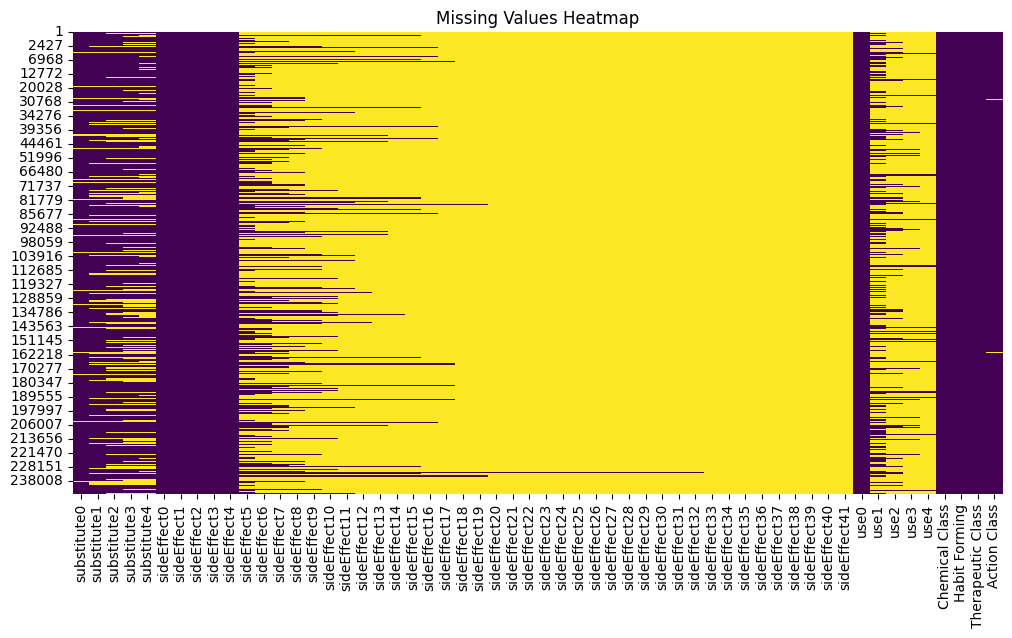

In [52]:
# Step 5: Exploratory Data Analysis (EDA)
## 5.1 Visualize Missing Values
plt.figure(figsize=(12, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

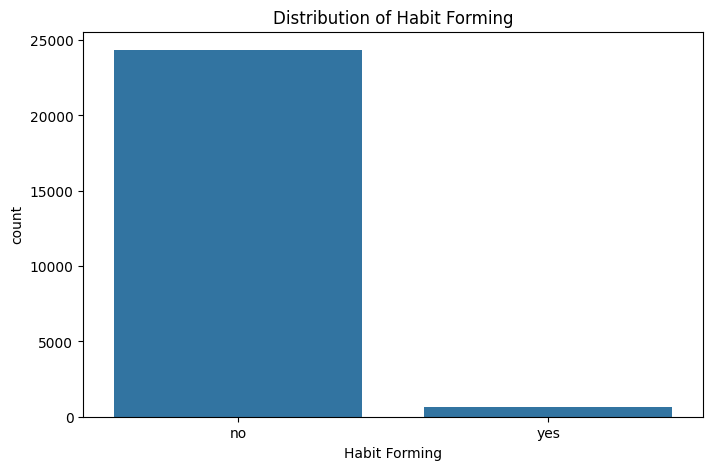

In [53]:
## 5.2 Distribution of Target Variable
plt.figure(figsize=(8, 5))
sns.countplot(x='Habit Forming', data=data)
plt.title('Distribution of Habit Forming')
plt.show()

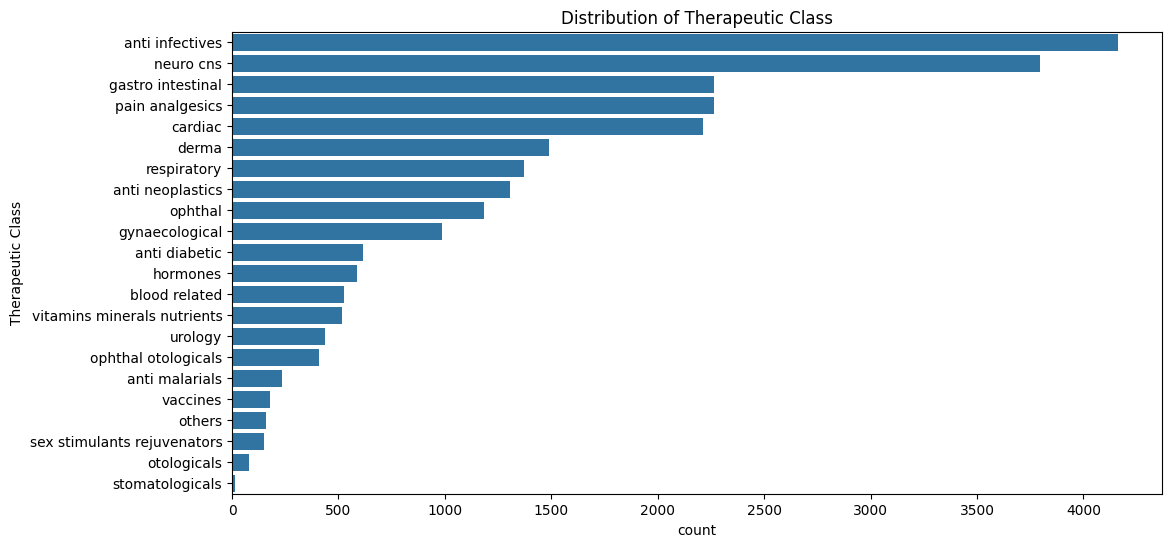

In [54]:
## 5.3 Distribution of Therapeutic Class
plt.figure(figsize=(12, 6))
sns.countplot(y='Therapeutic Class', data=data, order=data['Therapeutic Class'].value_counts().index)
plt.title('Distribution of Therapeutic Class')
plt.show()

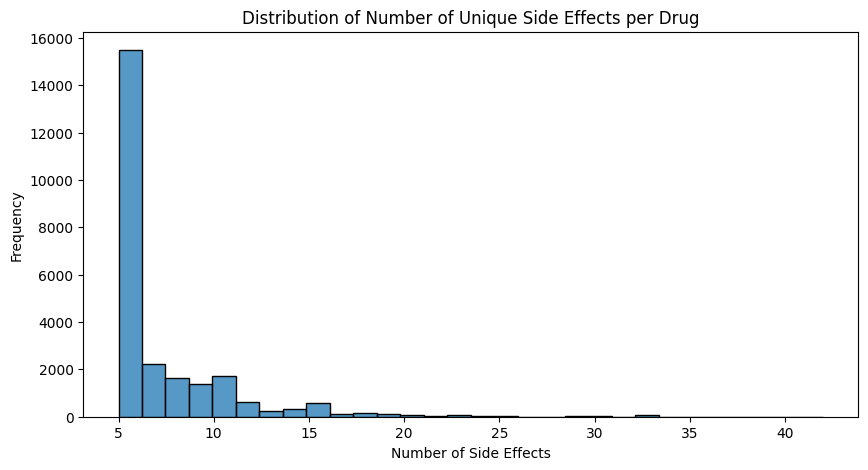

In [55]:
## 5.4 Side Effects Analysis
side_effect_counts = data.filter(like='sideEffect').notnull().sum(axis=1)
plt.figure(figsize=(10, 5))
sns.histplot(side_effect_counts, bins=30)
plt.title('Distribution of Number of Unique Side Effects per Drug')
plt.xlabel('Number of Side Effects')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Step 6: Feature Engineering
## 6.1 Count Side Effects
data['num_side_effects'] = data.filter(like='sideEffect').notnull().sum(axis=1)

In [57]:
## 6.2 One-Hot Encoding of Categorical Variables
categorical_cols = ['Therapeutic Class', 'Action Class', 'Habit Forming']
data_encoded = pd.get_dummies(data[categorical_cols], drop_first=True)
data = pd.concat([data, data_encoded], axis=1)
data.drop(categorical_cols, axis=1, inplace=True)

In [60]:
data.head(2)

,substitute0,substitute1,substitute2,substitute3,substitute4,sideEffect0,sideEffect1,sideEffect2,sideEffect3,sideEffect4,...,Action Class_vascular endothelial growth factor (vegf) inhibitor,Action Class_vascular endothelial growth factor (vegf) inhibitor for amd,Action Class_vasopressin analogues,Action Class_vasopressin antagonist,Action Class_vitamin k antagonists,Action Class_vitamins,Action Class_x ray contrast media (diagnostic agents),Action Class_xanthine oxidase inhibitors-gout,Action Class_μ-opioid receptor & norepinephrine reuptake inhibitor (nri),Habit Forming_yes
1,Zithrocare 500mg Tablet,Azax 500 Tablet,Zady 500 Tablet,Cazithro 500mg Tablet,Trulimax 500mg Tablet,Vomiting,Nausea,Abdominal pain,Diarrhea,No Side Effect,...,False,False,False,False,False,False,False,False,False,False
3,Lcfex Tablet,Etofex 120mg Tablet,Nexofex 120mg Tablet,Fexise 120mg Tablet,Histafree 120 Tablet,Headache,Drowsiness,Dizziness,Nausea,No Side Effect,...,False,False,False,False,False,False,False,False,False,False


In [61]:
# Step 7: Prepare Data for Modeling
## 7.1 Define Features and Target
X = data.drop(['Habit Forming_yes'], axis=1)
y = data['Habit Forming_yes']

In [62]:
## 7.2 Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [63]:
# Step 8: Initialize and Train Multiple Classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

Logistic Regression failed with error: could not convert string to float: 'Valodex 10mg Tablet'
Decision Tree failed with error: could not convert string to float: 'Valodex 10mg Tablet'
Random Forest failed with error: could not convert string to float: 'Valodex 10mg Tablet'
Gradient Boosting failed with error: could not convert string to float: 'Valodex 10mg Tablet'
Support Vector Machine failed with error: could not convert string to float: 'Valodex 10mg Tablet'
K-Nearest Neighbors failed with error: could not convert string to float: 'Valodex 10mg Tablet'


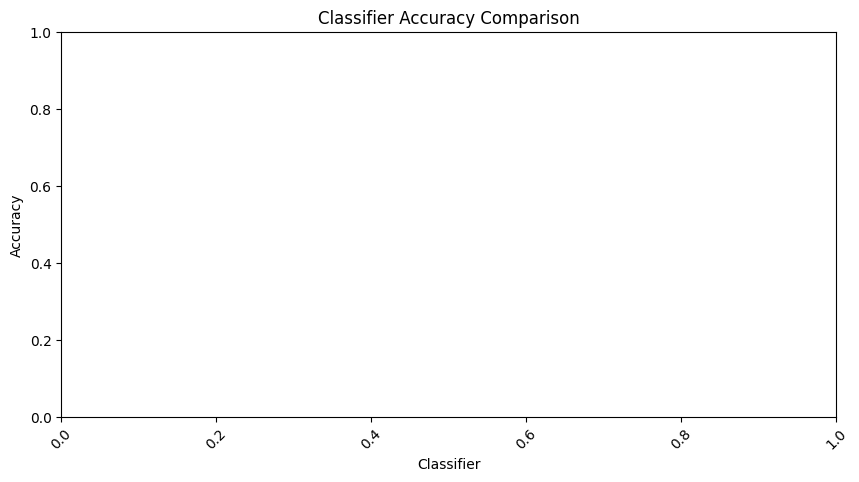

ValueError: could not convert string to float: 'Xciti Injection'

In [74]:
# Store accuracy results
accuracy_results = {}

# Train and evaluate each classifier
for name, clf in classifiers.items():
    try:
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracy_results[name] = accuracy
        print(f"{name} Accuracy: {accuracy:.4f}")
    except Exception as e:
        print(f"{name} failed with error: {e}")

# Step 9: Visualize the Accuracy Results
plt.figure(figsize=(10, 5))
sns.barplot(x=list(accuracy_results.keys()), y=list(accuracy_results.values()))
plt.title('Classifier Accuracy Comparison')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.ylim(0, 1)  # Set y-axis limits from 0 to 1
plt.show()

# Step 10: Detailed Classification Reports
for name, clf in classifiers.items():
    y_pred = clf.predict(X_test)
    print(f"\n{name} Classification Report:\n")
    print(classification_report(y_test, y_pred))

# Step 11: Determine the Best Model
best_model_name = max(accuracy_results, key=accuracy_results.get)
best_model_accuracy = accuracy_results[best_model_name]
print(f"The best model is {best_model_name} with an accuracy of {best_model_accuracy:.4f}.")